In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import urllib 
import os
import datetime

In [10]:
# csv file read/load
df = pd.read_csv('D:\\results.csv')
df.shape

(42082, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42082 entries, 0 to 42081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42082 non-null  object
 1   home_team   42082 non-null  object
 2   away_team   42082 non-null  object
 3   home_score  42082 non-null  int64 
 4   away_score  42082 non-null  int64 
 5   tournament  42082 non-null  object
 6   city        42082 non-null  object
 7   country     42082 non-null  object
 8   neutral     42082 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [12]:
print(' the field name of data:',df.columns)

 the field name of data: Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [13]:
# data output
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42077,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42078,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False
42079,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42080,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False


In [14]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [15]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [16]:
df.describe()

,home_score,away_score
count,42082.000000,42082.000000
mean,1.743691,1.186541
std,1.752459,1.403957
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [17]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [18]:
df["Year"]=pd.to_datetime(df['date']).dt.year
df["Month"]=pd.to_datetime(df['date']).dt.month
df=df.drop(columns=['date'], axis=1)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [19]:
df['total_score']=df['home_score']+df['away_score']
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3


In [20]:
con=[(df['home_score']==df['away_score']),(df['home_score']>df['away_score']),(df['home_score']<df['away_score'])]
val=[0,1,2]
val2=['no_win',df['home_team'],df['away_team']]
df['result']=np.select(con,val)
df['who_win']=np.select(con,val2)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [91]:
# teams with the most goals
bestteam=df.groupby('who_win').sum()
bestteam=bestteam[['home_score','away_score','total_score']].sort_values(by=['total_score'],ascending=False)
bestteam=bestteam.drop(['no_win'])
bestteam.head(10)

,home_score,away_score,total_score
who_win,,,
Brazil,1366,836,2202
England,1163,1036,2199
Germany,1233,886,2119
Sweden,1084,806,1890
Argentina,1158,622,1780
Hungary,1030,739,1769
Netherlands,914,598,1512
Mexico,945,483,1428
France,902,524,1426


In [22]:
# most winning teams
bestteam2=df.groupby('who_win').count()
bestteam2=bestteam2[['result']].sort_values(by=['result'],ascending=False)
bestteam2=bestteam2.drop(['no_win'])

bestteam2.head(10)

,result
who_win,
Brazil,629
England,580
Germany,560
Argentina,529
Sweden,506
South Korea,455
Mexico,443
Hungary,442
Italy,431


In [23]:
# merge most winning teams and gols
bestteam3=pd.merge(bestteam,bestteam2, how='inner', on='who_win')
bestteam3['teams']=bestteam3.index
bestteam3.head()

,home_score,away_score,total_score,result,teams
who_win,,,,,
Brazil,1366,836,2202,629,Brazil
England,1163,1036,2199,580,England
Germany,1233,886,2119,560,Germany
Sweden,1084,806,1890,506,Sweden
Argentina,1158,622,1780,529,Argentina


In [24]:
#the number of matches they played
match=df.groupby('home_team').count()+df.groupby('away_team').count()
match=match[['city']].sort_values(by=['city'],ascending=False)
match=match.rename(columns = {'city':'play_count'})
match['teams']=match.index
match.head()

,play_count,teams
Sweden,1030.0,Sweden
England,1020.0,England
Brazil,985.0,Brazil
Argentina,984.0,Argentina
Germany,961.0,Germany


In [92]:
#merge the number of matches they played and winner
bestteam=pd.merge(match,bestteam3,how='inner', on='teams')
bestteam['win_per_game']=bestteam4['result']/bestteam4['play_count']
bestteam['goal_per_game']=bestteam4['total_score']/bestteam4['play_count']
bestteam=bestteam4[['teams', 'play_count', 'total_score', 'result', 'win_per_game', 'goal_per_game']]
bestteam.head()

,teams,play_count,total_score,result,win_per_game,goal_per_game
282,Yorkshire,7.0,33,5,0.714286,4.714286
228,Padania,43.0,115,29,0.674419,2.674419
200,Jersey,82.0,186,55,0.670732,2.268293
290,Parishes of Jersey,3.0,14,2,0.666667,4.666667
273,County of Nice,9.0,21,6,0.666667,2.333333


In [93]:
bestteam=bestteam.sort_values(by=['win_per_game'],ascending=False)
bestteam.head(10)

,teams,play_count,total_score,result,win_per_game,goal_per_game
282,Yorkshire,7.0,33,5,0.714286,4.714286
228,Padania,43.0,115,29,0.674419,2.674419
200,Jersey,82.0,186,55,0.670732,2.268293
290,Parishes of Jersey,3.0,14,2,0.666667,4.666667
273,County of Nice,9.0,21,6,0.666667,2.333333
212,Basque Country,57.0,170,37,0.649123,2.982456
2,Brazil,985.0,2202,629,0.638579,2.235533
262,Andalusia,13.0,26,8,0.615385,2.000000
253,Rhodes,18.0,32,11,0.611111,1.777778
289,Crimea,5.0,9,3,0.600000,1.800000


<function matplotlib.pyplot.show(close=None, block=None)>

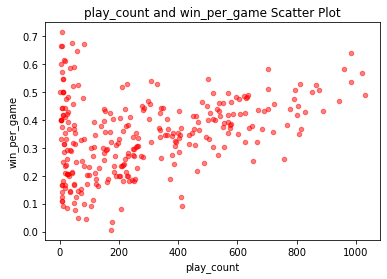

In [94]:
bestteam.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5)
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show

In [98]:
bestteam1=bestteam[(bestteam['win_per_game']>0,4) and (bestteam4['play_count']>800)]
bestteam1.head()

<ipython-input-98-7d1a4e215c46>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bestteam1=bestteam[(bestteam['win_per_game']>0,4) and (bestteam4['play_count']>800)]


,teams,play_count,total_score,result,win_per_game,goal_per_game
2,Brazil,985.0,2202,629,0.638579,2.235533
4,Germany,961.0,2119,560,0.582726,2.204995
1,England,1020.0,2199,580,0.568627,2.155882
3,Argentina,984.0,1780,529,0.537602,1.808943
12,Italy,812.0,1321,431,0.530788,1.626847


<function matplotlib.pyplot.show(close=None, block=None)>

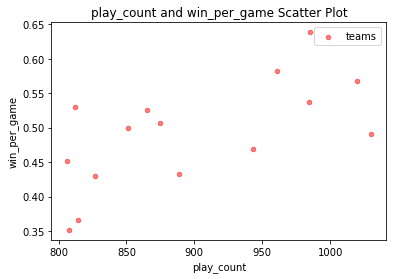

In [100]:
bestteam1.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5,label='teams')
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show

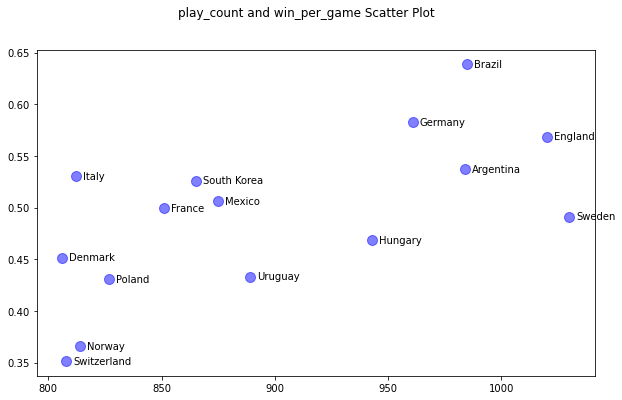

In [34]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('play_count and win_per_game Scatter Plot')

# Plot the scatter points
x=bestteam1['play_count']
y=bestteam1['win_per_game']
labels=bestteam1['teams']
ax.scatter(x,y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

plt.show()



In [36]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [37]:
teams=df[['Year','who_win']]
teams.head()

,Year,who_win
0,1872,no_win
1,1873,England
2,1874,Scotland
3,1875,no_win
4,1876,Scotland


In [102]:
def re_find(who_win):
    if "no_win" not in who_win.lower():
        return True
    return False

teams2=teams[teams['who_win'].apply(re_find)]

teams2.head()

,Year,who_win
1,1873,England
2,1874,Scotland
4,1876,Scotland
5,1876,Scotland
6,1877,Scotland


In [103]:
list1=[]
list2=[]
list3=[]
b=teams2['Year'].count()
for i in range(0,b):
    list1.append(teams2['Year'].iloc[i])
    list2.append(teams2['who_win'].iloc[i])
    a=str(teams2['Year'].iloc[i])+teams2['who_win'].iloc[i]
    list3.append(a)
    
list_label = ["Year","who_win","Year_who_win"] 
list_col = [list1,list2,list3]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped)  

teams3 = pd.DataFrame(data_dict)
teams3.head()   

,Year,who_win,Year_who_win
0,1873,England,1873England
1,1874,Scotland,1874Scotland
2,1876,Scotland,1876Scotland
3,1876,Scotland,1876Scotland
4,1877,Scotland,1877Scotland


In [106]:
teams4=teams3.groupby('Year_who_win').count()
team4=teams4[['who_win']].sort_values(by=['who_win'], ascending=False)
teams4.head()

,Year,who_win
Year_who_win,,
1873England,1,1
1874Scotland,1,1
1876Scotland,2,2
1877Scotland,2,2
1878Scotland,2,2


In [41]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [42]:
con=[(df['home_team']==df['who_win']),(df['away_team']==df['who_win'])]
val=['home_win','away_win']
val2=[1,1]
df['home_away_win']=np.select(con,val)
df['home_away_win2']=np.select(con,val2)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win,home_away_win,home_away_win2
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win,0,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England,home_win,1
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland,home_win,1
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win,0,0
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland,home_win,1


In [43]:
#home advantage?
data1=df.groupby('home_away_win').count()
data1[['who_win']]

,who_win
home_away_win,
0,9700
away_win,11924
home_win,20458


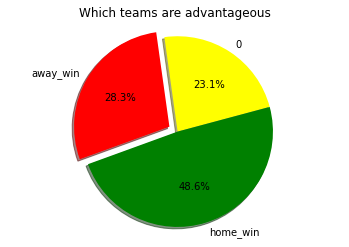

In [109]:
my_colors = ['yellow','red','green']
my_explode = (0, 0.1, 0)
plt.pie(data1['who_win'], labels=data1.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Which teams are advantageous')
plt.axis('equal')
plt.show()

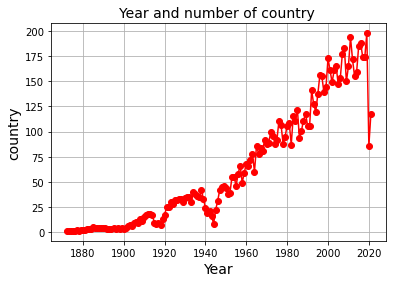

In [46]:

df_c=df[['Year','country']]
df_c = df_c.drop_duplicates()
df_c1=df_c.groupby('Year').count()

plt.plot(df_c1.index, df_c1['country'], color='red', marker='o')
plt.title('Year and number of country ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('country', fontsize=14)
plt.grid(True)
plt.show()

In [49]:
data_c = df.drop(df[df.country == df.home_team].index)
list1=[]
list2=[]
b=len(data_c.index)
for i in range(0,b):
    list1.append(data_c['country'].iloc[i])
    list2.append(1)

list_label = ["Country","Num"] 
list_col = [list1,list2]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped) 

data_c3 = pd.DataFrame(data_dict) 
data_c4=data_c3.groupby('Country').count()
data_c5=data_c4[['Num']]
data_c6=data_c5.sort_values(by=['Num'], ascending=False)
data_c6.head()

,Num
Country,
United States,772
Malaysia,428
France,375
South Africa,284
United Arab Emirates,276


<AxesSubplot:>

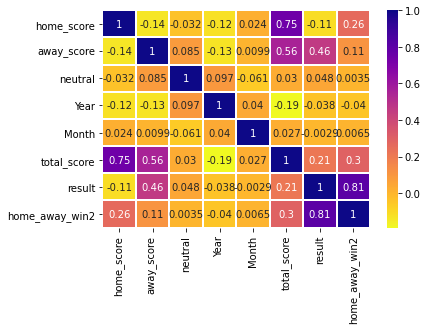

In [53]:
df_corr = df.corr()
sns.heatmap(df_corr,cmap='plasma_r', lw = 1, annot = True)

In [54]:
df['tournament'].value_counts()

Friendly                                17189
FIFA World Cup qualification             7363
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
Dragon Cup                                  4
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

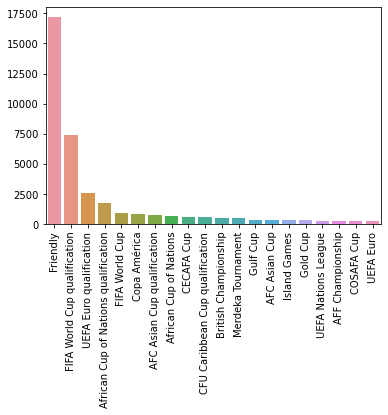

In [55]:
sns.barplot(x=df['tournament'].value_counts().index[:20],y=df['tournament'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.show()

In [56]:
df['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [110]:
LT=len(df['tournament'].unique())
LT

112

In [61]:
tournament=df['tournament'].value_counts()
names=tournament.index
values=tournament.values

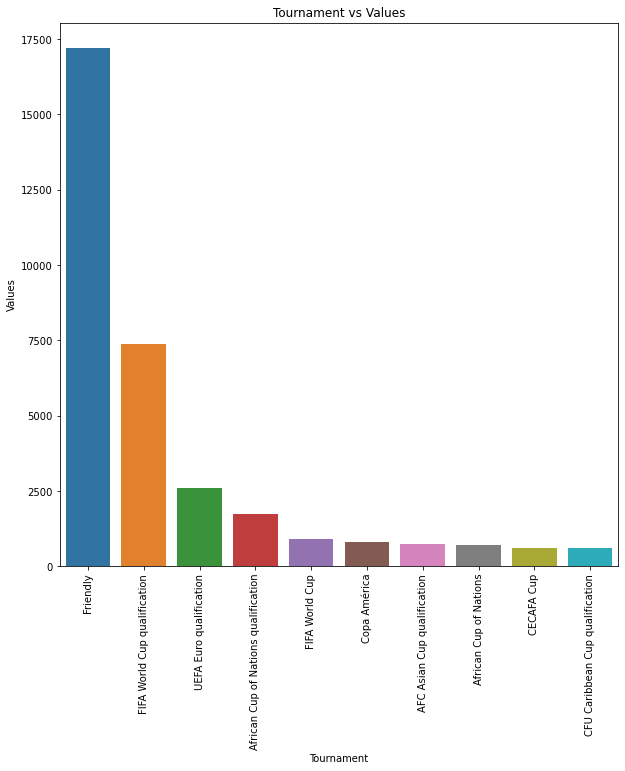

In [111]:
plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Tournament')
plt.title('Tournament vs Values')
plt.show()

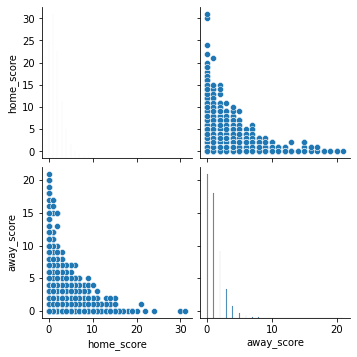

In [69]:
sns.pairplot(df.iloc[:,2:5])
plt.show()

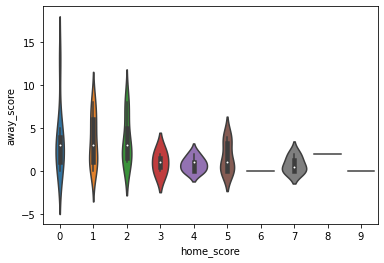

In [70]:
sns.violinplot(x=df['home_score'][:50],y=df['away_score'][:50])
plt.show()

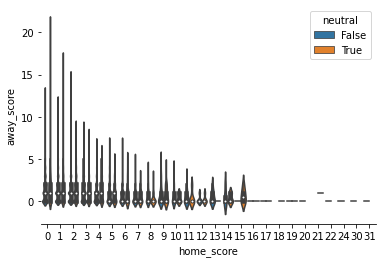

In [73]:
sns.violinplot(x="home_score", y="away_score", hue="neutral",data=df)
sns.despine(left=True)
plt.show()

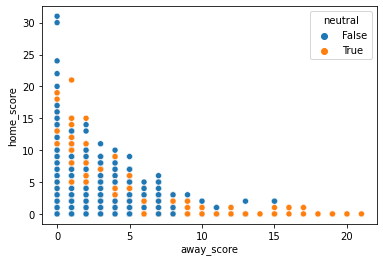

In [74]:
sns.scatterplot(y="home_score", x="away_score",
                hue="neutral",data=df)
plt.show()

In [118]:


veri=df[df['tournament']=='FIFA World Cup'].tail(56)
veri



,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win,home_away_win,home_away_win2
39914,Costa Rica,Serbia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,1,2,Serbia,away_win,1
39915,Germany,Mexico,0,1,FIFA World Cup,Moscow,Russia,True,2018,6,1,2,Mexico,away_win,1
39916,Brazil,Switzerland,1,1,FIFA World Cup,Rostov-on-Don,Russia,True,2018,6,2,0,no_win,0,0
39917,Sweden,South Korea,1,0,FIFA World Cup,Nizhny Novgorod,Russia,True,2018,6,1,1,Sweden,home_win,1
39918,Belgium,Panama,3,0,FIFA World Cup,Sochi,Russia,True,2018,6,3,1,Belgium,home_win,1
39919,Tunisia,England,1,2,FIFA World Cup,Volgograd,Russia,True,2018,6,3,2,England,away_win,1
39920,Colombia,Japan,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,3,2,Japan,away_win,1
39921,Poland,Senegal,1,2,FIFA World Cup,Moscow,Russia,True,2018,6,3,2,Senegal,away_win,1
39922,Russia,Egypt,3,1,FIFA World Cup,St. Petersburg,Russia,False,2018,6,4,1,Russia,home_win,1
39923,Portugal,Morocco,1,0,FIFA World Cup,Moscow,Russia,True,2018,6,1,1,Portugal,home_win,1


In [120]:
veri=df[df['tournament']=='FIFA World Cup'].tail(56)

len(veri['home_team'].unique())
allteam=veri['home_team'].unique()
allteam

array(['Costa Rica', 'Germany', 'Brazil', 'Sweden', 'Belgium', 'Tunisia',
       'Colombia', 'Poland', 'Russia', 'Portugal', 'Uruguay', 'Iran',
       'Denmark', 'France', 'Argentina', 'Nigeria', 'Serbia',
       'South Korea', 'England', 'Japan', 'Saudi Arabia', 'Spain',
       'Australia', 'Iceland', 'Mexico', 'Switzerland', 'Senegal',
       'Panama', 'Croatia'], dtype=object)

In [121]:
away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(veri[veri['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(veri[veri['home_team']==team].home_score))
    toplam=0

away_scores_allteam
home_scores_allteam
allteam

all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam])
                       
all_team

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Costa Rica,Germany,Brazil,Sweden,Belgium,Tunisia,Colombia,Poland,Russia,Portugal,...,Japan,Saudi Arabia,Spain,Australia,Iceland,Mexico,Switzerland,Senegal,Panama,Croatia
1,0,2,6,2,13,1,2,1,6,1,...,2,2,2,0,1,0,2,0,1,3
2,1,2,3,2,4,2,3,5,7,0,...,3,1,2,2,2,3,2,1,2,2


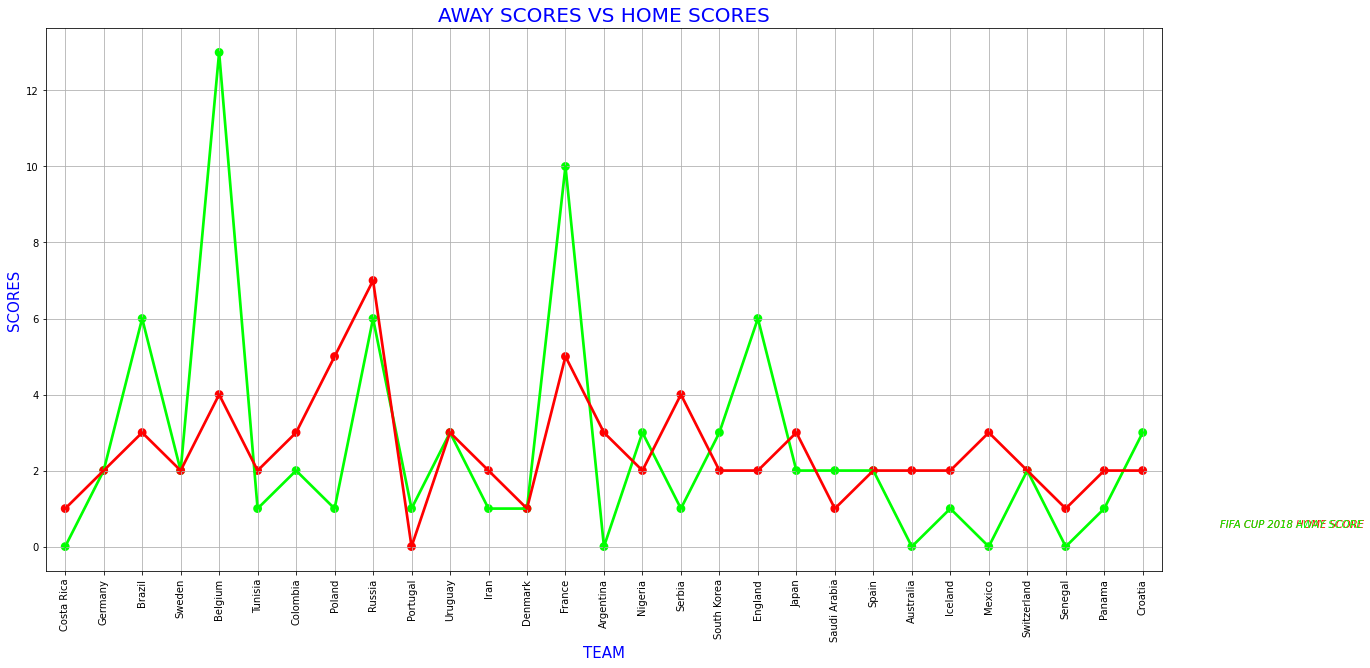

In [122]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=allteam,y=home_scores_allteam,data=veri,color='lime',alpha=0.8)
sns.pointplot(x=allteam,y=away_scores_allteam,data=veri,color='red',alpha=0.8)
plt.text(30,0.5,'FIFA CUP 2018 HOME SCORE',color='red',fontsize = 10,style = 'italic')
plt.text(30,0.5,'FIFA CUP 2018 AWAY SCORE',color='lime',fontsize = 10,style = 'italic')
plt.xlabel('TEAM',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('SCORES',fontsize = 15,color='blue')
plt.title('AWAY SCORES VS HOME SCORES',fontsize = 20,color='blue')
plt.grid()

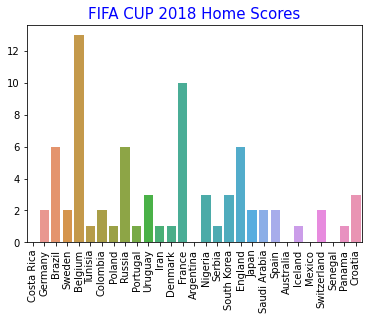

In [123]:
sns.barplot(x=allteam,y=home_scores_allteam)
plt.title('FIFA CUP 2018 Home Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

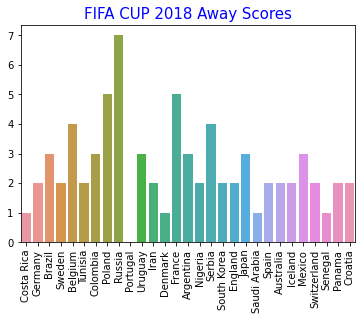

In [124]:
sns.barplot(x=allteam,y=away_scores_allteam)
plt.title('FIFA CUP 2018 Away Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [125]:
tournament = matches['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

NameError: name 'matches' is not defined